### Stock Market Prediction Using  LSTM

In [ ]:
# Data Set used is Last 5 year named= AAPL_5year.csv
# Predicted next 20 days stock price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from numpy import array

In [2]:
df=pd.read_csv('AAPL_5year.csv')

In [3]:
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  2017-05-03  36.397499  36.872501  36.067501  36.764999  34.712048   
1  2017-05-04  36.630001  36.785000  36.452499  36.632500  34.586933   
2  2017-05-05  36.689999  37.244999  36.689999  37.240002  35.160519   
3  2017-05-08  37.257500  38.424999  37.257500  38.252499  36.116474   
4  2017-05-09  38.467499  38.720001  38.362499  38.497501  36.347797   

      Volume  
0  182788000  
1   93487600  
2  109310800  
3  195009600  
4  156521600

In [4]:
df1=df.reset_index()['Close']

In [5]:
df1

0        36.764999
1        36.632500
2        37.240002
3        38.252499
4        38.497501
           ...    
1252    161.789993
1253    162.880005
1254    156.800003
1255    156.570007
1256    163.639999
Name: Close, Length: 1257, dtype: float64

In [6]:
df2=df
df2=df2.drop(["Open","High","Low","Adj Close","Volume"],axis=1)
df2

Date       Close
0     2017-05-03   36.764999
1     2017-05-04   36.632500
2     2017-05-05   37.240002
3     2017-05-08   38.252499
4     2017-05-09   38.497501
...          ...         ...
1252  2022-04-22  161.789993
1253  2022-04-25  162.880005
1254  2022-04-26  156.800003
1255  2022-04-27  156.570007
1256  2022-04-28  163.639999

[1257 rows x 2 columns]

In [7]:
df2['Date']=pd.to_datetime(df2['Date'],format='%Y%m%d',errors='ignore')

In [8]:
df2.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

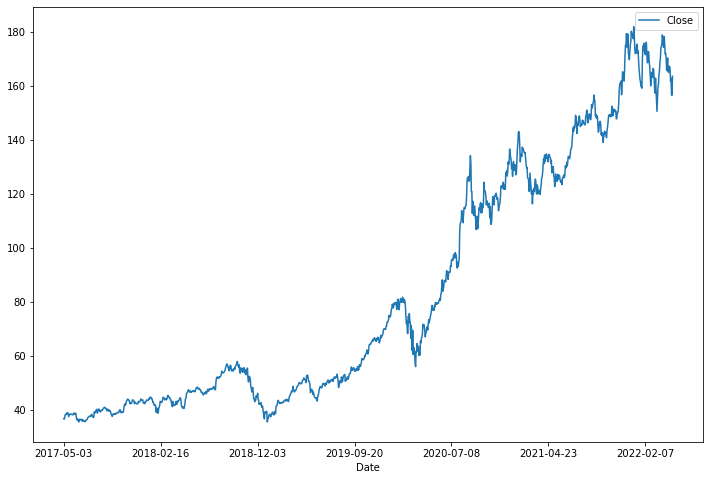

In [9]:
df2.plot(figsize=(12,8))

In [10]:
# To Normalize the data, we apply MinMax Scaler.
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(879, 378)

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(778, 100)
(778,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
## Sometimes this model is working and sometimes it is not..

model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))
#model.add(Dense(32))
#model.add(Dense(16))
#model.add(Dense(2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [19]:
#model=Sequential()
#model.add(LSTM(64,return_sequences=True,input_shape=(100,1)))
#model.add(LSTM(64,return_sequences=True))
#model.add(LSTM(64))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error',optimizer='adam')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 64)           16896     
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 83,009
Trainable params: 83,009
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 21s 666ms/step - loss: 0.0086 - val_loss: 0.0048
Epoch 2/100
13/13 [==============================] - 5s 395ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 3/100
13/13 [==============================] - 5s 424ms/step - loss: 9.9219e-04 - val_loss: 0.0020
Epoch 4/100
13/13 [==============================] - 5s 417ms/step - loss: 8.0077e-04 - val_loss: 0.0023
Epoch 5/100
13/13 [==============================] - 5s 381ms/step - loss: 8.5887e-04 - val_loss: 0.0028
Epoch 6/100
13/13 [==============================] - 5s 411ms/step - loss: 7.3872e-04 - val_loss: 0.0023
Epoch 7/100
13/13 [==============================] - 5s 412ms/step - loss: 6.7232e-04 - val_loss: 0.0027
Epoch 8/100
13/13 [==============================] - 5s 380ms/step - loss: 6.1080e-04 - val_loss: 0.0037
Epoch 9/100
13/13 [==============================] - 5s 394ms/step - loss: 6.4268e-04 - val_loss: 0.0023
Epoch 10/100
13/13 [==============================] - 5s 410ms

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
a=ytest.reshape(277,1)

In [25]:
a=scaler.inverse_transform(a)

In [26]:
#MAE, MSE, RMSE Error
print('Mean Absolute error: ', metrics.mean_absolute_error(a,test_predict))
print('Mean Squared Error: ', metrics.mean_squared_error(a,test_predict))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(a,test_predict)))

Mean Absolute error:  11.257610321793205
Mean Squared Error:  159.90491043862937
Root Mean Squared Error:  12.645351337097335


In [27]:
b = df['Adj Close'].tail(277)
df4 = pd.DataFrame(b)
df4['Predicted']=test_predict
df4.tail(5)

Adj Close   Predicted
1252  161.789993  150.106964
1253  162.880005  149.773010
1254  156.800003  146.595612
1255  156.570007  146.015732
1256  163.639999  143.015656

In [28]:
len(test_data)

378

In [29]:
#100 less than test_data
x_input=test_data[278:].reshape(1,-1)
x_input.shape


(1, 100)

In [30]:
tmp=list(x_input)
tmp=tmp[0].tolist()

In [31]:
# demonstrate prediction for next 20 days
from numpy import array

output=[]
n_steps=100
i=0
while(i<20):
    
    if(len(tmp)>100):
        x_input=np.array(tmp[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        tmp.extend(yhat[0].tolist())
        tmp=tmp[1:]
        output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        tmp.extend(yhat[0].tolist())
        print(len(tmp))
        output.extend(yhat.tolist())
        i=i+1
    

print(output)

[0.7576395]
101
1 day input [0.92605614 0.95268418 0.94913376 0.98252114 0.95719047 0.94756342
 0.98149702 0.93343006 0.92578307 0.9162926  0.93841434 0.95650766
 0.96087738 0.98852953 0.98142868 0.98204325 0.97398653 0.96968515
 1.         0.98422806 0.95159172 0.93165489 0.93281558 0.93295217
 0.95268418 0.95575662 0.93295217 0.93896056 0.916634   0.89225911
 0.88051549 0.86617741 0.86078347 0.84822056 0.84760608 0.84439706
 0.92025267 0.95063585 0.94947516 0.95787318 0.93779977 0.93431768
 0.92933351 0.95097726 0.96087738 0.93247418 0.90871386 0.91035254
 0.93704872 0.93541014 0.91035254 0.89956479 0.87921831 0.85020064
 0.86843055 0.88283697 0.88468037 0.87157123 0.89451226 0.89225911
 0.87136641 0.84494329 0.83224379 0.86986431 0.8396177  0.81374072
 0.78567892 0.81619868 0.84692327 0.85395578 0.87689682 0.88645564
 0.9099429  0.91943338 0.94578825 0.95022621 0.9562346  0.97917564
 0.97105067 0.94947516 0.94742683 0.97562521 0.9525476  0.9304942
 0.93261076 0.91861398 0.88898185 0

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,121)

In [33]:
len(df1)

1257

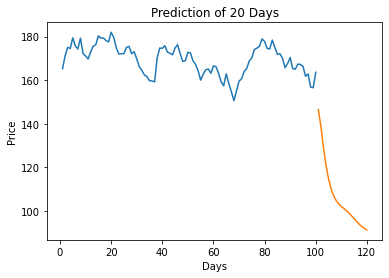

In [34]:
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Prediction of 20 Days')
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(output))

In [35]:
# Predicted price of next 20 days
pred=scaler.inverse_transform(output)
pred

array([[146.51327572],
       [138.91900902],
       [129.28219432],
       [121.08190178],
       [114.75924176],
       [110.14749166],
       [106.93325878],
       [104.75398831],
       [103.25559336],
       [102.13129846],
       [101.14390062],
       [100.13520195],
       [ 99.02490972],
       [ 97.8006319 ],
       [ 96.50112465],
       [ 95.19585133],
       [ 93.96452416],
       [ 92.87957903],
       [ 91.99431165],
       [ 91.33717694]])

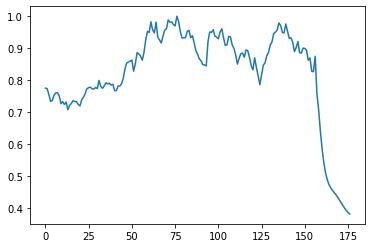

In [36]:
#last 50-80 of len df1
df3=df1.tolist()
df3.extend(output)
plt.plot(df3[1100:])

In [37]:
df3=scaler.inverse_transform(df3).tolist()

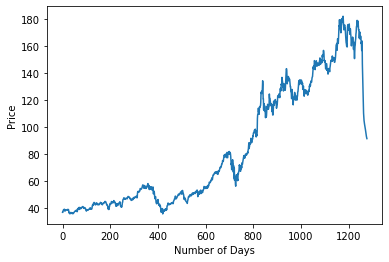

In [38]:
plt.xlabel('Number of Days')
plt.ylabel('Price')
plt.plot(df3)

In [39]:
df5 = pd.DataFrame(pred,columns=['Predicted Price'])
df5.head(10)

Predicted Price
0       146.513276
1       138.919009
2       129.282194
3       121.081902
4       114.759242
5       110.147492
6       106.933259
7       104.753988
8       103.255593
9       102.131298

In [40]:
df5.tail(10)

Predicted Price
10       101.143901
11       100.135202
12        99.024910
13        97.800632
14        96.501125
15        95.195851
16        93.964524
17        92.879579
18        91.994312
19        91.337177